<a href="https://colab.research.google.com/github/RENISA-GRACELIN/Online_Internship_Projects/blob/main/Bing2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report

In [2]:
# Directories
train_dir = '/content/drive/MyDrive/DR/Train'
valid_dir = '/content/drive/MyDrive/DR/Valid'
test_dir = '/content/drive/MyDrive/DR/Test'

In [3]:
# Data Loading
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(300,300), batch_size=8, class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(300,300), batch_size=8, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(300,300), batch_size=8, class_mode='categorical')


Found 1753 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Found 268 images belonging to 5 classes.


In [4]:
# Model Creation
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 classes for 5 stages of diabetic retinopathy
])


In [5]:
# Model Compilation
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


In [6]:
# Model Training
model.fit(train_generator, epochs=50, validation_data=valid_generator)


Epoch 1/50
220/220 [==============================] - 532s 2s/step - loss: 1.7767 - accuracy: 0.2561 - val_loss: 1.5048 - val_accuracy: 0.2940
Epoch 2/50
220/220 [==============================] - 407s 2s/step - loss: 1.5156 - accuracy: 0.3023 - val_loss: 1.4996 - val_accuracy: 0.3020
Epoch 3/50
220/220 [==============================] - 405s 2s/step - loss: 1.4931 - accuracy: 0.3155 - val_loss: 1.4650 - val_accuracy: 0.3120
Epoch 4/50
220/220 [==============================] - 413s 2s/step - loss: 1.4870 - accuracy: 0.3229 - val_loss: 1.4695 - val_accuracy: 0.3280
Epoch 5/50
220/220 [==============================] - 431s 2s/step - loss: 1.4437 - accuracy: 0.3617 - val_loss: 1.4475 - val_accuracy: 0.3300
Epoch 6/50
220/220 [==============================] - 425s 2s/step - loss: 1.4052 - accuracy: 0.3776 - val_loss: 1.4578 - val_accuracy: 0.3560
Epoch 7/50
220/220 [==============================] - 405s 2s/step - loss: 1.3698 - accuracy: 0.4005 - val_loss: 1.4217 - val_accuracy: 0.3600

In [12]:
# Model Evaluation
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')


34/34 [==============================] - 19s 547ms/step - loss: 3.6677 - accuracy: 0.4776
Test accuracy: 0.4776119291782379


In [ ]:
import numpy as np

In [9]:
# Performance Metrics Calculation
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = [np.argmax(p) for p in y_pred]


34/34 [==============================] - 13s 360ms/step


In [10]:
print('Confusion Matrix:')
print(confusion_matrix(y_true, y_pred))
print('Classification Report:')
print(classification_report(y_true, y_pred, target_names=['Stage 0', 'Stage 1', 'Stage 2', 'Stage 3', 'Stage 4']))

Confusion Matrix:
[[ 8 10 11 14  7]
 [ 6 10 19 17 16]
 [ 6 13 13  7 11]
 [ 8  9 13 10 10]
 [ 5 13  7 14 11]]
Classification Report:
              precision    recall  f1-score   support

     Stage 0       0.24      0.16      0.19        50
     Stage 1       0.18      0.15      0.16        68
     Stage 2       0.21      0.26      0.23        50
     Stage 3       0.16      0.20      0.18        50
     Stage 4       0.20      0.22      0.21        50

    accuracy                           0.19       268
   macro avg       0.20      0.20      0.19       268
weighted avg       0.20      0.19      0.19       268



63/63 [==============================] - 23s 364ms/step


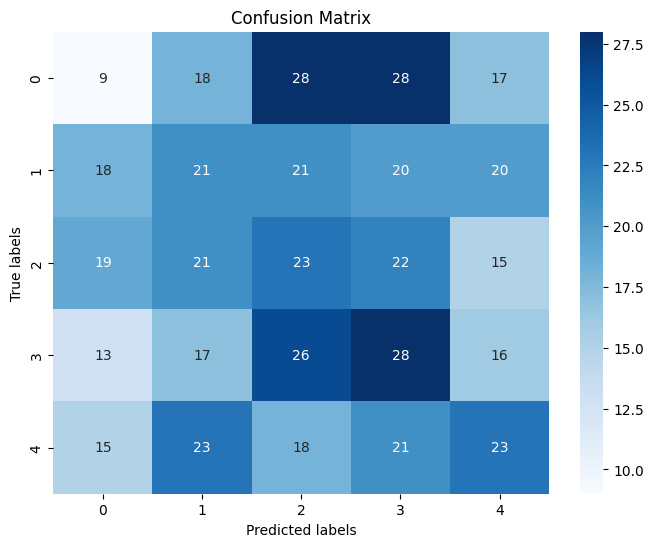

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Generate predictions from the deep learning model
dl_predictions = model.predict(valid_generator)
dl_predictions_classes = np.argmax(dl_predictions, axis=1)

# Plot confusion matrix for Deep Learning Model
dl_conf_matrix = confusion_matrix(valid_generator.classes, dl_predictions_classes)
plot_confusion_matrix(dl_conf_matrix, valid_generator.class_indices.keys())
